In [2]:
#read main csv file
import pandas as pd
import csv

df = pd.read_csv('/home/csdeptucy/Desktop/GroupProject/1000players.csv')
print(df.head(2))

          session_id  index  elapsed_time      event_name   name  level  page  \
0  20090312431273200      0             0  cutscene_click  basic      0   NaN   
1  20090312431273200      1          1323    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991405  -159.314686          380.0          494.0             NaN   
1  -413.991405  -159.314686          380.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   

                                           text_fqid  fullscreen  hq  music  \
0               tunic.historicalsociety.closet.intro           0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   

  level_group  
0         0-4  
1         0-4  


In [2]:
#drop unwanted columns
columns_to_drop = ['name', 'page','screen_coor_x','screen_coor_y','hover_duration','fqid','room_fqid','text_fqid','level_group']
mixcolImp = df.drop(columns=columns_to_drop)
mixcolImp.to_csv('filesImp.csv', index=False)
print("Drop columns operation done")

Drop columns operation done


In [3]:
#transform time stamp to time count
df = pd.read_csv('filesImp.csv')
print("file readed")
count = 0
prev = 0
cur = 0;
for i in range(1, len(df)):
    if df.iloc[i, 2] == 0:
        prev = 0
        continue
    elif df.iloc[i, 2]>=prev:
        cur = df.iloc[i, 2]
        df.iloc[i, 2] = df.iloc[i, 2] - prev
        prev = cur
        if df.iloc[i, 2] < 0:
            count += 1

# Save the updated DataFrame to a new CSV file
df.to_csv('fileImpUpd.csv', index=False)

# Print the count of negative values
print("Transformation done ")
print("Number of negative values:", count)

file readed
Transformation done 
Number of negative values: 0


In [53]:
#sort fileImpUpd
df = pd.read_csv('fileImpUpd.csv')
df = df.sort_values(['session_id','index'])
df.to_csv('sorted_fileImpUpd.csv', index=False)
print('file sorted')

file sorted


In [4]:
#calculate player average time
df = pd.read_csv('sorted_fileImpUpd.csv')
start_index = None
end_index = None
sum_values = 0
count_values = 0
averages = []

for i in range(len(df)):
    if df.iloc[i, 1] == 0:  # Check if column 3 is equal to 0
        if start_index is not None:  # Check if this is not the first 0 value
            average = sum_values / (count_values+1)
            averages.append(average)
            sum_values = 0
            count_values = 0
        start_index = i
    elif start_index is not None:  # Check if we have already found a start index
        sum_values += df.iloc[i, 2]
        count_values += 1

# Check if there is an end index after the last 0 value
if start_index is not None and end_index is None:
    end_index = len(df)
    average = sum_values / (count_values+1)
    averages.append(average)

# Print the list of averages
print("Averages of Players:", averages)
print(len(averages))


Averages of Players: [11005.987514188422, 49817.832332058984, 34441.40105540897, 19412.27693856999, 18776.469168900803, 12579.59526261586, 15011.210019267823, 67583.48221343874, 58560.745778611636, 14866.376425855513, 26500.102161100196, 31023.48163693599, 33555.07090909091, 14561.430597771023, 54742.23622782446, 59524.218934911245, 26369.26601520087, 10710.926144756279, 39199.00387897595, 3476.5588558855884, 116899.40864917396, 74934.84615384616, 15683.193333333333, 20586.701960784314, 101741.2739169675, 25741.120728929385, 5056.420026007802, 12152.444327731093, 35275.347627737225, 36940.74420849421, 42932.56849953402, 7723.466174661747, 27433.390019697963, 10523.267217630853, 11447.989406779661, 167198.48428405123, 105170.37821565408, 38350.78614718615, 5707.876044568246, 13753.651626442812, 44835.69518190757, 31343.6673992674, 90699.2096195262, 52429.937989556136, 7275.922222222222, 22204.798440979954, 21144.659242761692, 8332.307971014492, 18699.1556039173, 23928.314565483477, 3602

In [5]:
#average of all players

avg_col_2 = df['elapsed_time'].mean()

# Print the average
print("Average:", avg_col_2)


Average: 94597.38465432868


In [6]:
#sort train labels
df = pd.read_csv('train_labels.csv')
df = df.sort_values(by='session_id')
df.to_csv('sorted_train_labels.csv', index=False)
print('sort done')
counter = 0
df = pd.read_csv('sorted_train_labels.csv')
with open('first_sorted_train_labels.csv',mode='w',newline='') as new:
    csv_writer = csv.writer(new)
    for index,row in df.iterrows():
        csv_writer.writerow(row)
        if df.iloc[index,0][:17] != df.iloc[index+1,0][:17]:
            counter = counter + 1
        if counter == 1000:
            break
print('first 1000 players answers created')
    

sort done
first 1000 players answers created


In [12]:
#correlation between correct answers and fullscreen hq music
# read the csv file
df = pd.read_csv('fileImpUpd.csv')
df = df.sort_values(by='session_id')
# group the dataframe by player ID column
grouped = df.groupby(df.iloc[:, 0])

# define a lambda function that returns the first 18 rows of each group
get_first_18_rows = lambda x: x.iloc[:18]

# apply the lambda function to each group and concatenate the results
result = pd.concat([get_first_18_rows(group) for name, group in grouped])
columns_to_drop = ['session_id','index','elapsed_time','event_name','level','room_coor_x','room_coor_y','text']
col = result.drop(columns=columns_to_drop)
col.to_csv('test.csv',index=False)
df2 = pd.read_csv('first_sorted_train_labels.csv')
print("Drop columns operation done")
#copy test.csv to first_sorted_train_labels.csv
        
            
    

Drop columns operation done


In [20]:
#correlation
import statsmodels.formula.api as smf
df = pd.read_csv('first_sorted_train_labels.csv')
corr_matrix = df[['answer', 'fullscreen']].corr()
print('answer-fullscreen')
print(corr_matrix)
corr_matrix = df[['answer', 'hq']].corr()
print('\nanswer-hq')
print(corr_matrix)
corr_matrix = df[['answer', 'music']].corr()
print('\nanswer-music')
print(corr_matrix)
corr_matrix = df[['answer','fullscreen','hq','music']].corr()
print('\nanswer-music-fullscreen','hq')
print(corr_matrix)
print('\n\n-------covariance---------\n\n')
covariance = df['answer'].cov(df['fullscreen'])
print('Covariance with fscreen:', covariance)
covariance = df['answer'].cov(df['hq'])
print('Covariance with hq:', covariance)
covariance = df['answer'].cov(df['music'])
print('Covariance with music:', covariance)
print('\n\n-------regression-analysis---------\n\n')
model = smf.ols(formula='answer ~ fullscreen', data=df).fit()
print(model.summary())
model = smf.ols(formula='answer ~ hq', data=df).fit()
print(model.summary())
model = smf.ols(formula='answer ~ music', data=df).fit()
print(model.summary())

answer-fullscreen
             answer  fullscreen
answer      1.00000     0.00111
fullscreen  0.00111     1.00000

answer-hq
          answer        hq
answer  1.000000  0.013196
hq      0.013196  1.000000

answer-music
          answer     music
answer  1.000000 -0.000812
music  -0.000812  1.000000

answer-music-fullscreen hq
              answer  fullscreen        hq     music
answer      1.000000    0.001110  0.013196 -0.000812
fullscreen  0.001110    1.000000  0.382867  0.013670
hq          0.013196    0.382867  1.000000 -0.124186
music      -0.000812    0.013670 -0.124186  1.000000


-------covariance---------


Covariance with fscreen: 0.0001780654480803832
Covariance with hq: 0.0020648369353853144
Covariance with music: -0.00010972831823992658


-------regression-analysis---------


                            OLS Regression Results                            
Dep. Variable:                 answer   R-squared:                       0.000
Model:                            OLS   A

In [9]:
# math answers to players
with open('1000players.csv', 'r') as players, open('train_labels.csv', 'r') as score:
    # Create CSV reader object
    screader = csv.reader(score)
    reader = csv.reader(players)    
    data = next(reader)
    rows = list(reader)
    score_data = list(screader)
    #sort
    print("Start sorting",flush=True)
    sorted_rows = sorted(rows, key=lambda x: int(x[0]))
    print("Sorting has Ended")
    # open output file
    output = open("mixfiles.csv",'w',newline='')
    writer = csv.writer(output)
    writer.writerow(data)
    found = 0
    for row in sorted_rows:
        if row[3] == 'checkpoint':
            found = found+1
            writer.writerow(row)
            level = int(row[5])
            if level == 4:
                threashold = 3
            if level == 12:
                threashold = 10
            if level == 22:
                threashold = 5
            count = 0
            for scrow in score_data:
                if count == threashold:
                    count = 0
                    break
                #question q1-q3
                #print(str(row[0])+ " == "+ str(scrow[0])[:17])
                if str(row[0]) == str(scrow[0])[:17] and int(row[5]) == 4:
                    if 'q1' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q2' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q3' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                #question q4-q13
                if str(row[0]) == str(scrow[0])[:17] and int(row[5]) == 12:
                    if 'q4' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q5' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q6' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q7' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q8' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q9' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q10' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q11' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q12' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q13' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                #question q14-q18
                if str(row[0]) == str(scrow[0])[:17] and int(row[5]) == 22:
                    if 'q14' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q15' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q16' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q17' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
                    if 'q18' in scrow[0]:
                        writer.writerow(scrow)
                        count=count+1
        else:
            writer.writerow(row)
    print("Checkpoints Found:"+str(found))

    output.close

    #checpoints at level 4(q1-q3) - 12(q4-q13) - 22(q14-q18)

Start sorting
Sorting has Ended
Checkpoints Found:3018


In [32]:
#question correct persentage
df = pd.read_csv('train_labels.csv')

# extract the question number from the first column
df['session_id'] = df['session_id'].str.extract('.{19}(\d+)').astype(int)

# group by question number and calculate the mean of the correct answers
result = df.groupby('session_id')['correct'].mean() * 100

# print the result
print(result)

session_id
1     72.748493
2     97.882183
3     93.400390
4     79.823445
5     54.825567
6     77.595281
7     73.605806
8     61.722265
9     73.627027
10    50.543248
11    64.362108
12    86.295730
13    27.510398
14    70.766488
15    48.102878
16    73.486971
17    68.780239
18    95.064086
Name: correct, dtype: float64


In [35]:
#correlation of questions
df = pd.read_csv('train_labels.csv')

# Reshape column 2
col2_reshaped = df.iloc[:, 1].values.reshape(-1, 18)

# Create a list of column names
column_names = ['q{}'.format(i) for i in range(1, 19)]

# Create a DataFrame from the reshaped column with named columns
df_reshaped = pd.DataFrame(col2_reshaped, columns=column_names)

corr_matrix = df_reshaped.corr()

print(corr_matrix)

           q1        q2        q3        q4        q5        q6        q7  \
q1   1.000000  0.145448  0.140302  0.134892  0.148909  0.156515  0.147547   
q2   0.145448  1.000000  0.154288  0.145656  0.142202  0.159548  0.143122   
q3   0.140302  0.154288  1.000000  0.136588  0.146273  0.143899  0.152771   
q4   0.134892  0.145656  0.136588  1.000000  0.149321  0.138205  0.156026   
q5   0.148909  0.142202  0.146273  0.149321  1.000000  0.145437  0.156063   
q6   0.156515  0.159548  0.143899  0.138205  0.145437  1.000000  0.155835   
q7   0.147547  0.143122  0.152771  0.156026  0.156063  0.155835  1.000000   
q8   0.138724  0.153740  0.147911  0.149343  0.150644  0.150281  0.152426   
q9   0.146152  0.147781  0.142144  0.146038  0.138979  0.148129  0.155916   
q10  0.148211  0.149701  0.158013  0.149614  0.169589  0.145691  0.154733   
q11  0.147494  0.161925  0.151585  0.145833  0.141773  0.159693  0.141464   
q12  0.155688  0.134021  0.149755  0.161409  0.158280  0.151829  0.140086   

In [16]:
#players correctness
df = pd.read_csv('first_sorted_train_labels.csv')

# Extract the player id from the first column
df['player_id'] = df['session_quest'].str[:17]

# Calculate the mean correctness for each player
correctness_percentage = df.groupby('player_id')['answer'].mean() * 100

# Print the result
print(correctness_percentage)

player_id
20090312431273200    88.888889
20090312433251036    55.555556
20090312455206810    94.444444
20090313091715820    66.666667
20090313571836404    88.888889
                       ...    
20100506283035824    88.888889
20100507054888268    66.666667
20100507072808210    94.444444
20100507142168800    66.666667
20100507154031370    94.444444
Name: answer, Length: 1000, dtype: float64


In [15]:
#create correctness and average csv
new_df = pd.DataFrame({'correctness_percentage': correctness_percentage, 'average': averages})
new_df.to_csv('time_correctness.csv', mode='w', header=False)


NameError: name 'correctness_percentage' is not defined

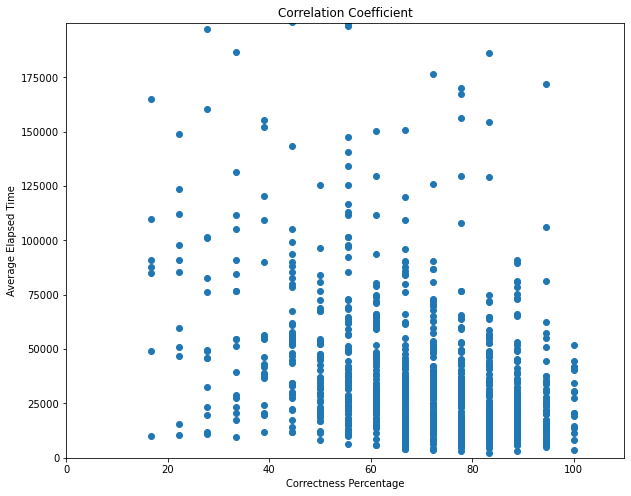

-0.01776613520032024
3.818786892142731e-13
0.0


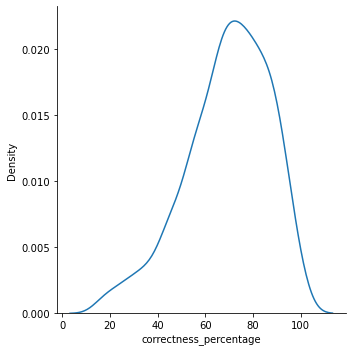

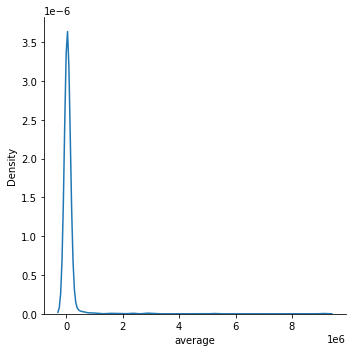

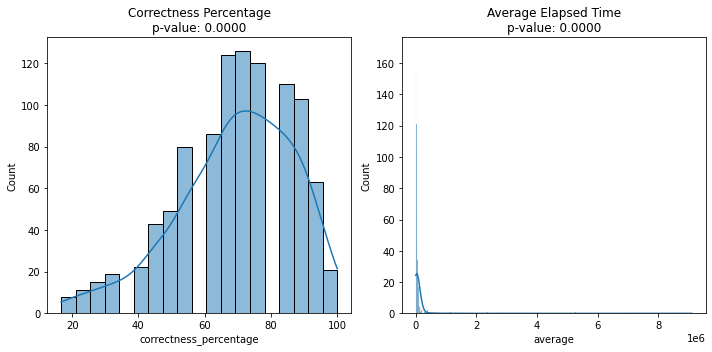

In [10]:
#calculate correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df = pd.read_csv('time_correctness.csv')
corr_coef = merged_df['average'].corr(merged_df['correctness_percentage'])

plt.subplots(figsize=(10, 8))

plt.scatter(merged_df['correctness_percentage'], merged_df['average'])
plt.xlim(0,110)
plt.ylim(0,199999)
plt.xlabel('Correctness Percentage')
plt.ylabel('Average Elapsed Time')
plt.title(f'Correlation Coefficient')


plt.show()
print(corr_coef)

sns.displot(merged_df['correctness_percentage'], kind='kde')
from scipy import stats
_, p = stats.normaltest(merged_df['correctness_percentage'])
print(p)

sns.displot(merged_df['average'], kind='kde')
from scipy import stats
_, p = stats.normaltest(merged_df['average'])
print(p)

from scipy import stats

# create subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot first variable
sns.histplot(merged_df['correctness_percentage'], ax=axs[0], kde=True)
_, p1 = stats.normaltest(merged_df['correctness_percentage'])
axs[0].set_title(f'Correctness Percentage\np-value: {p1:.4f}')

# plot second variable
sns.histplot(merged_df['average'], ax=axs[1], kde=True)
_, p2 = stats.normaltest(merged_df['average'])
axs[1].set_title(f'Average Elapsed Time\np-value: {p2:.4f}')
# adjust layout and show plot
plt.tight_layout()
plt.show()

In [20]:
#find sum of time
df = pd.read_csv('sorted_fileImpUpd.csv')
start_index = None
end_index = None
sum_values = 0
count_values = 0
sums = []

for i in range(len(df)):
    if df.iloc[i, 1] == 0:  # Check if column 3 is equal to 0
        if start_index is not None:  # Check if this is not the first 0 value
            sums.append(sum_values)
            sum_values = 0
            count_values = 0
        start_index = i
    elif start_index is not None:  # Check if we have already found a start index
        sum_values += df.iloc[i, 2]
        count_values += 1

# Check if there is an end index after the last 0 value
if start_index is not None and end_index is None:
    end_index = len(df)
    sums.append(sum_values)

# Print the list of averages
print(len(sums))

1000


In [21]:
new_df = pd.DataFrame({'correctness_percentage': correctness_percentage, 'sum': sums})
new_df.to_csv('sumtime_correctness.csv', mode='w', header=False)

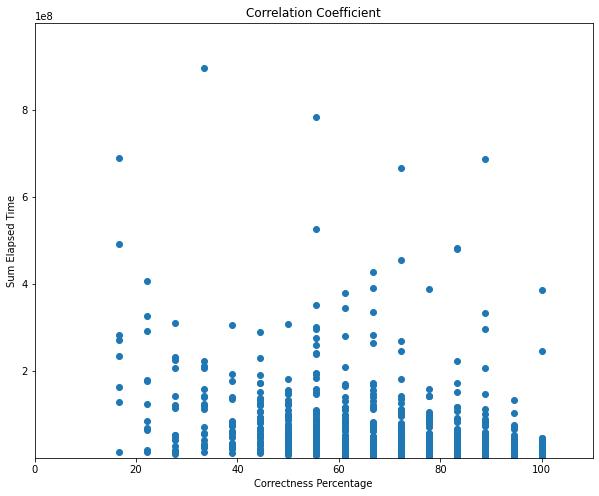

-0.05544867513907933
3.818786892142731e-13
0.0


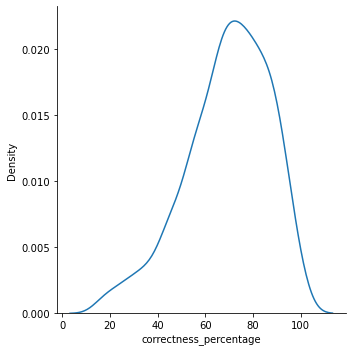

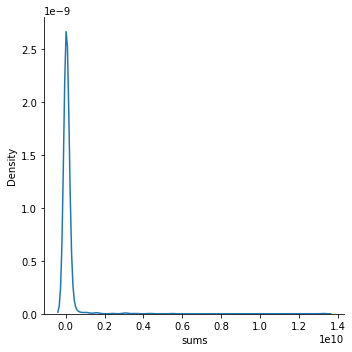

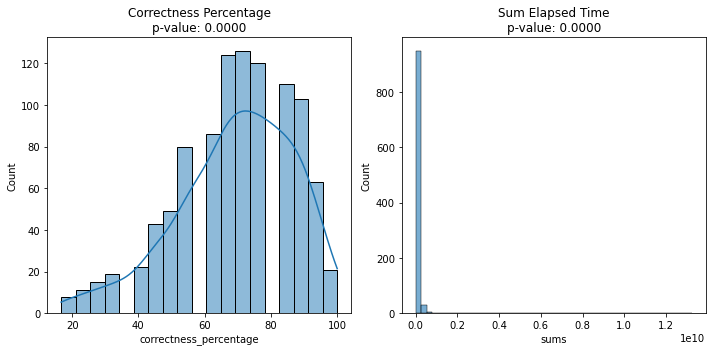

In [29]:
#calculate correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df = pd.read_csv('sumtime_correctness.csv')
corr_coef = merged_df['sums'].corr(merged_df['correctness_percentage'])

plt.subplots(figsize=(10, 8))

plt.scatter(merged_df['correctness_percentage'], merged_df['sums'])
plt.xlim(0,110)
plt.ylim(1000000,999999999)
plt.xlabel('Correctness Percentage')
plt.ylabel('Sum Elapsed Time')
plt.title(f'Correlation Coefficient')


plt.show()
print(corr_coef)

sns.displot(merged_df['correctness_percentage'], kind='kde')
from scipy import stats
_, p = stats.normaltest(merged_df['correctness_percentage'])
print(p)

sns.displot(merged_df['sums'], kind='kde')
from scipy import stats
_, p = stats.normaltest(merged_df['sums'])
print(p)

from scipy import stats

# create subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot first variable
sns.histplot(merged_df['correctness_percentage'], ax=axs[0], kde=True)
_, p1 = stats.normaltest(merged_df['correctness_percentage'])
axs[0].set_title(f'Correctness Percentage\np-value: {p1:.4f}')

# plot second variable
sns.histplot(merged_df['sums'], bins=50, alpha=0.6)
_, p2 = stats.normaltest(merged_df['sums'])
axs[1].set_title(f'Sum Elapsed Time\np-value: {p2:.4f}')

# adjust layout and show plot
plt.tight_layout()
plt.show()

In [15]:
#elapsed time for chap1.csv
import pandas as pd

df = pd.read_csv('sorted_fileImpUpd.csv')

dfn = pd.DataFrame()
checkpoint = 0
for i in range(len(df)):
    if df.iloc[i, 1] == 0:  # Check if column 3 is equal to 0
        checkpoint = 0
    if checkpoint == 0:
        if df.iloc[i,3] == 'checkpoint':
            dfn = dfn.append(df.loc[i])
            checkpoint = 1
    if checkpoint == 0:
        dfn = dfn.append(df.loc[i])
dfn.to_csv('testerdumb.csv', index=False)
print('run fin')

run fin


In [29]:
ans = pd.read_csv('train_labels.csv', nrows=1001)
print(ans.head())

dfn = pd.read_csv('testerdumb.csv')
sumel = 0
sums = []
first = 0
counter = 0
for i in range(len(dfn)):
    if first == 0:
        if dfn.iloc[i, 0] == 0:  # Check if column 3 is equal to 0
            sumel += dfn.iloc[i,0]
            first = 1
            counter += 1
    elif dfn.iloc[i,0] == 0:
        sums.append(sumel)
        sumel = 0
        counter += 1
    else:
        sumel += dfn.iloc[i,0]
    if counter == 1002:
        break

ans['sums'] = sums
ans.to_csv('firstchapwithans.csv',index=False)


             session_id  correct
0  20090312431273200_q1        1
1  20090312433251036_q1        0
2  20090312455206810_q1        1
3  20090313091715820_q1        0
4  20090313571836404_q1        1


In [30]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('firstchapwithans.csv')

# Calculate the correlation coefficient between the two columns
corr_coefficient = df['correct'].corr(df['sums'])

# Print the correlation coefficient
print("Correlation coefficient:", corr_coefficient)


Correlation coefficient: 0.02641444756928962


In [44]:
#elapsed time for chap1.csv
import pandas as pd

dfn = pd.read_csv('sorted_fileImpUpd.csv')

start = 0
end = 0
sums = []
sumt = 0
found = 0
counter = 0
for i in range(len(dfn)):
    if dfn.iloc[i, 7] == "Hey Jo, let's take a look at the shirt!":  # Check if column 3 is equal to 0
            sumt += dfn.iloc[i, 2]
            found = 1
    elif dfn.iloc[i, 7] == "I'll be at the Capitol. Let me know if you find anything!":  # Check if column 3 is equal to 0
        sumt += dfn.iloc[i, 2]
        sums.append(sumt)
        counter += 1
        found = 0
        sumt = 0
    elif found == 1:
        sumt += dfn.iloc[i, 2]
    if counter == 1001:
        break

print(sums)
print('run fin')

[39303, 95678, 1337275, 321850, 141081, 99452, 101450, 745947, 48419, 45687, 80484, 105682, 176958, 46706, 184380, 407403, 49679, 55401, 440131, 83429, 598635, 142669, 513237, 96220, 376471, 366104, 59007, 118593, 90723, 376466, 143366, 50125, 312534, 207053, 179702, 526641, 36686, 172006, 99924, 78528, 63315, 90583, 51159, 718149, 66300, 63702, 62156, 56648, 73107, 99156, 89612, 263065, 74280, 541357, 211118, 369300, 693603, 342288, 54011, 127617, 68158, 115150, 78635, 442252, 131586, 118121, 71552, 46074, 169911, 571568, 72302, 46444, 75329, 46321, 192595, 73207, 188530, 271820, 154211, 128042, 523653, 540814, 55737, 599414, 182898, 116810, 52358, 224691, 276280, 86926, 69155, 622274, 402037, 106366, 64017, 54375, 162364, 98935, 123129, 213493, 145502, 218977, 56941, 406229, 65058, 62269, 226644, 256370, 69866, 297381, 314460, 41535, 149991, 505272, 57727, 92358, 810168, 64414, 212108, 89130, 99217, 51548, 218215, 64977, 77900, 49644, 67653, 740490, 54920, 74582, 82981, 212826, 64051

In [45]:
ans['sums'] = sums
ans.to_csv('firstchapwithans2.csv',index=False)

In [46]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('firstchapwithans2.csv')

# Calculate the correlation coefficient between the two columns
corr_coefficient = df['correct'].corr(df['sums'])

# Print the correlation coefficient
print("Correlation coefficient:", corr_coefficient)

Correlation coefficient: -0.020479552876380785


In [49]:
import pandas as pd
import scipy.stats as stats

# Read in the CSV file
df = pd.read_csv('firstchapwithans2.csv')

# Separate the elapsed time values for correct and incorrect answers
correct_times = df.loc[df['correct'] == 1, 'sums']
incorrect_times = df.loc[df['correct'] == 0, 'sums']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(correct_times, incorrect_times)

# Print the p-value
print("P-value:", p_value)


P-value: 0.5175009947101887


In [50]:
df = pd.read_csv('first_sorted_train_labels.csv')

# Extract the player id from the first column
df['player_id'] = df['session_quest'].str[:17]

# Calculate the mean correctness for each player
correctness_percentage = df.groupby('player_id')['answer'].mean() * 100

# Print the result
print(correctness_percentage)

player_id
20090312431273200    88.888889
20090312433251036    55.555556
20090312455206810    94.444444
20090313091715820    66.666667
20090313571836404    88.888889
                       ...    
20100506283035824    88.888889
20100507054888268    66.666667
20100507072808210    94.444444
20100507142168800    66.666667
20100507154031370    94.444444
Name: answer, Length: 1000, dtype: float64


In [53]:
correctness_percentage.to_csv('correctness_percentage.csv', index=True)
df = pd.read_csv('correctness_percentage.csv')
df['sums'] = sums
df.to_csv('correctness_percentage.csv',index=False)

In [58]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('correctness_percentage.csv')

# Calculate the correlation coefficient between the two columns
corr_coefficient = df['answer'].corr(df['sums'])

# Print the correlation coefficient
print("Correlation coefficient:", corr_coefficient)



Correlation coefficient: 0.029075427070435787


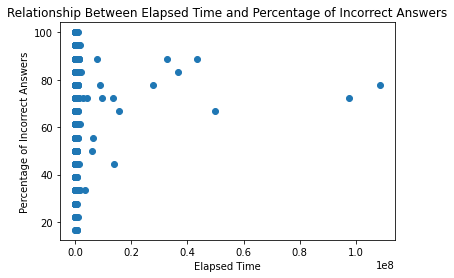

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('correctness_percentage.csv')

# Create a scatter plot of elapsed time vs percentage of incorrect answers
plt.scatter(df['sums'], df['answer'])
plt.xlabel('Elapsed Time')
plt.ylabel('Percentage of Incorrect Answers')
plt.title('Relationship Between Elapsed Time and Percentage of Incorrect Answers')
plt.show()


In [60]:
import pandas as pd
import statsmodels.api as sm

# Read in the CSV file
df = pd.read_csv('correctness_percentage.csv')

# Perform a linear regression analysis
X = df['sums']
y = df['answer']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the linear regression analysis
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 answer   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8444
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.358
Time:                        02:58:12   Log-Likelihood:                -4293.8
No. Observations:                1000   AIC:                             8592.
Df Residuals:                     998   BIC:                             8601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.3503      0.566    122.603      0.0

        player_id     answer    sums
451  2.010021e+16  16.666667   46985
205  2.010011e+16  16.666667   61431
682  2.010031e+16  16.666667  133185
271  2.010011e+16  16.666667  143957
848  2.010041e+16  16.666667  197849


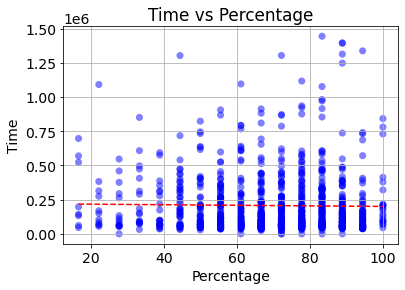

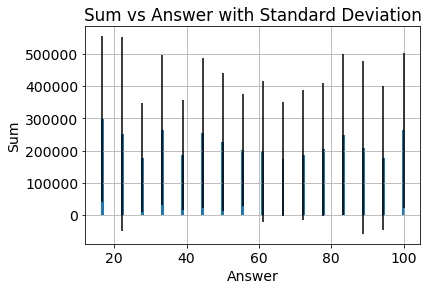

In [21]:
#graph score persentage and elapsed time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('correctness_percentage.csv')
df = df.sort_values(by=['answer', 'sums'])
print(df.head())
# Create a scatter plot of the data
df = df[df['sums'] <= 1500000]

# Create a scatter plot of the filtered data
plt.scatter(df['answer'], df['sums'], s=50, alpha=0.5, c='blue', edgecolors='none')

# Add a trend line to the scatter plot
z = np.polyfit(df['answer'], df['sums'], 1)
p = np.poly1d(z)
plt.plot(df['answer'], p(df['answer']), 'r--')

# Set the labels and title of the plot
plt.xlabel('Percentage')
plt.ylabel('Time')
plt.title('Time vs Percentage')

# Add a grid to the plot
plt.grid(True)

# Customize the appearance of the plot
plt.rcParams.update({'font.size': 14})

# Show the plot
plt.show()


df = df.rename(columns={'answer': 'answer', 'sums': 'sums'})

# Calculate the mean and standard deviation for each unique value of 'answer'
grouped = df.groupby('answer')['sums'].agg(['mean', 'std'])

# Create a bar chart of the mean 'sum' values for each unique value of 'answer'
plt.bar(grouped.index, grouped['mean'], yerr=grouped['std'])

# Set the labels and title of the plot
plt.xlabel('Answer')
plt.ylabel('Sum')
plt.title('Sum vs Answer with Standard Deviation')

# Add a grid to the plot
plt.grid(True)

# Customize the appearance of the plot
plt.rcParams.update({'font.size': 14})

# Show the plot
plt.show()

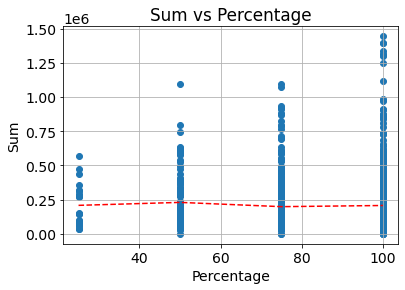

             user_id  percentage     sums
0  20090312431273200       100.0    39303
1  20090312433251036        75.0    95678
2  20090312455206810       100.0  1337275
3  20090313091715820        75.0   321850
4  20090313571836404       100.0   141081
5  20090314035813970       100.0    99452
6  20090314121766812        75.0   101450
7  20090314221187252        50.0   745947
8  20090314363702160       100.0    48419
9  20090314441803444       100.0    45687


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a CSV file
df = pd.read_csv('first_sorted_train_labels.csv')

last_two_chars = df['session_quest'].str[-2:]

# Filter the rows based on the extracted values
filtered_df = df[(last_two_chars == 'q1') | (last_two_chars == 'q2') | (last_two_chars == 'q3') | (last_two_chars == 'q4')]


columns_to_drop = ['fullscreen','hq','music']
df = filtered_df.drop(columns=columns_to_drop)
# Print the filtered DataFrame

# Extract the user ID from the 'session_quest' column using the str method
df['user_id'] = df['session_quest'].str[:17]

# Group the rows by user ID and count the total number of questions answered by each user
total_counts = df.groupby('user_id')['answer'].count()

# Count the number of questions answered with 1 by each user
count_ones = df[df['answer'] == 1].groupby('user_id')['answer'].count()

# Calculate the percentage of 1 for each user
percentages = (count_ones / total_counts) * 100

# Create a new DataFrame to store the results
results_df = pd.DataFrame({'user_id': percentages.index, 'percentage': percentages.values})

# Print the results

df1 = pd.read_csv('correctness_percentage.csv')
df2 = pd.DataFrame(df1['sums'])
results_df['sums'] = df2

# Create a scatter plot of the data
results_df = results_df[results_df['sums'] <= 1500000]

# Calculate the mean value of each column
mean_values = results_df.groupby('percentage')['sums'].mean()

# Create a scatter plot of the data
plt.scatter(results_df['percentage'], results_df['sums'])

plt.plot(mean_values.index, mean_values.values, 'r--')

# Set the labels and title of the plot
plt.xlabel('Percentage')
plt.ylabel('Sum')
plt.title('Sum vs Percentage')

# Add a grid to the plot
plt.grid(True)

# Customize the appearance of the plot
plt.rcParams.update({'font.size': 14})

# Show the plot
plt.show()
print(results_df.head(10))

In [4]:
#elapsed time for chap1.csv
import pandas as pd

dfn = pd.read_csv('sorted_fileImpUpd.csv')

start = 0
end = 0
sums = []
sumt = 0
found = 0
counter = 0
for i in range(len(dfn)):
    if dfn.iloc[i, 7] == "Hey Jo, let's take a look at the shirt!":  # Check if column 3 is equal to 0
        sumt += dfn.iloc[i, 2]
        found = 1
    elif dfn.iloc[i, 7] == "That's it":  # Check if column 3 is equal to 0
        sumt += dfn.iloc[i, 2]
        found = 0
    elif dfn.iloc[i, 7] == "Go ahead, take a peek at the shirt!":  # Check if column 3 is equal to 0
            sumt += dfn.iloc[i, 2]
            found = 1
    elif dfn.iloc[i, 7] == "This looks like a clue!":  # Check if column 3 is equal to 0
        sumt += dfn.iloc[i, 2]
        sums.append(sumt)
        counter += 1
        found = 0
        sumt = 0
    elif found == 1:
        sumt += dfn.iloc[i, 2]
    if counter == 1001:
        break

print(sums)
print('run fin')

[28399, 59364, 1328295, 162267, 122697, 69231, 38718, 739970, 35816, 27909, 58417, 70096, 140127, 30472, 60857, 379296, 37575, 31474, 387539, 54302, 442118, 107604, 175596, 64155, 238765, 277614, 35974, 24574, 58176, 211804, 100062, 33671, 289701, 67694, 152747, 363581, 28864, 148217, 89113, 48513, 38123, 35284, 35934, 706706, 42045, 46894, 36081, 42016, 54372, 60683, 54503, 141173, 57877, 387077, 193695, 358962, 674886, 75377, 33570, 81967, 42182, 101391, 43535, 85421, 70499, 78646, 50034, 30895, 41902, 293795, 47229, 28829, 55878, 27092, 180859, 43244, 167207, 42446, 135759, 86794, 499136, 503865, 39135, 80713, 134282, 102585, 40761, 162436, 194504, 56196, 43970, 464155, 120856, 48977, 43034, 32439, 97470, 77052, 78770, 178638, 124560, 111970, 29105, 189392, 43077, 30011, 62283, 242687, 45316, 276369, 198399, 27559, 139297, 381352, 32134, 53811, 493149, 48816, 165129, 54003, 51575, 38465, 200607, 33029, 51389, 30446, 35486, 601197, 40115, 42110, 58754, 177879, 424613, 45099, 429901, 

In [2]:
#elapsed time for chap1.csv
import pandas as pd

dfn = pd.read_csv('sorted_fileImpUpd.csv')

start = 0
end = 0
sums = []
sumt = 0
found = 0
counter = 0
for i in range(len(dfn)):
    if dfn.iloc[i, 7] == "Hey Jo, let's take a look at the shirt!":  # Check if column 3 is equal to 0
            sumt += dfn.iloc[i, 2]
            found = 1
    elif dfn.iloc[i, 7] == "That's it!":  # Check if column 3 is equal to 0
        sumt += dfn.iloc[i, 2]
        sums.append(sumt)
        counter += 1
        found = 0
        sumt = 0
    elif found == 1:
        sumt += dfn.iloc[i, 2]
    if counter == 1001:
        break

print(sums)
print('run fin')

[91103, 306500, 1369232, 543989, 173464, 727531, 175485, 1859330, 86166, 76828, 691959, 1130596, 590235, 856132, 506655, 1502177, 100290, 144195, 685926, 133439, 1120422, 196765, 757230, 164922, 1659284, 615743, 107395, 164130, 167325, 1104296, 226885, 115215, 352800, 338767, 208887, 1076418, 1302310, 1658565, 211544, 130251, 90925, 162448, 1626265, 1207359, 109777, 698647, 94658, 240624, 2458552, 129548, 145596, 512468, 142549, 912059, 1307398, 399461, 1553217, 443425, 74870, 881498, 230543, 146748, 1037131, 855316, 497272, 405965, 677844, 813831, 197443, 613308, 141517, 1640410, 155887, 874577, 219173, 502899, 1228057, 545456, 186248, 173047, 608515, 3617539, 656823, 1033849, 221898, 141851, 87323143, 283401, 413256, 144736, 119025, 1219643, 1139693, 127649, 83284, 625571, 5167482, 424357, 847528, 966850, 178053, 499979, 544967, 440296, 1698368, 1015737, 291957, 1179007, 385860, 714891, 1826730, 291076, 200773, 668555, 127273, 443785, 2772193, 965275, 286031, 137142, 138206, 226698, 

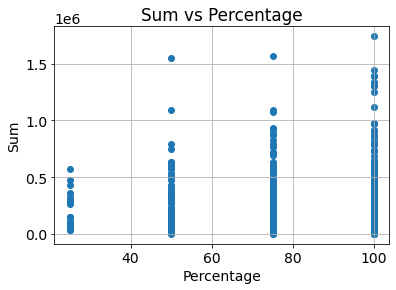

             user_id  percentage     sums
0  20090312431273200       100.0    39303
1  20090312433251036        75.0    95678
2  20090312455206810       100.0  1337275
3  20090313091715820        75.0   321850
4  20090313571836404       100.0   141081
5  20090314035813970       100.0    99452
6  20090314121766812        75.0   101450
7  20090314221187252        50.0   745947
8  20090314363702160       100.0    48419
9  20090314441803444       100.0    45687


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from a CSV file
df = pd.read_csv('first_sorted_train_labels.csv')

last_two_chars = df['session_quest'].str[-2:]

# Filter the rows based on the extracted values
filtered_df = df[(last_two_chars == 'q1') | (last_two_chars == 'q2') | (last_two_chars == 'q3') | (last_two_chars == 'q4')]


columns_to_drop = ['fullscreen','hq','music']
df = filtered_df.drop(columns=columns_to_drop)
# Print the filtered DataFrame

# Extract the user ID from the 'session_quest' column using the str method
df['user_id'] = df['session_quest'].str[:17]

# Group the rows by user ID and count the total number of questions answered by each user
total_counts = df.groupby('user_id')['answer'].count()

# Count the number of questions answered with 1 by each user
count_ones = df[df['answer'] == 1].groupby('user_id')['answer'].count()

# Calculate the percentage of 1 for each user
percentages = (count_ones / total_counts) * 100

# Create a new DataFrame to store the results
results_df = pd.DataFrame({'user_id': percentages.index, 'percentage': percentages.values})

# Print the results

df1 = pd.read_csv('correctness_percentage.csv')
df2 = pd.DataFrame(df1['sums'])
results_df['sums'] = df2

# Create a scatter plot of the data
results_df = results_df[results_df['sums'] <= 1900000]

# Calculate the mean value of each column
mean_values = results_df.groupby('percentage')['sums'].mean()

# Create a scatter plot of the data
plt.scatter(results_df['percentage'], results_df['sums'])

# Set the labels and title of the plot
plt.xlabel('Percentage')
plt.ylabel('Sum')
plt.title('Sum vs Percentage')

# Add a grid to the plot
plt.grid(True)

# Customize the appearance of the plot
plt.rcParams.update({'font.size': 14})

# Show the plot
plt.show()
print(results_df.head(10))